In [1]:
!pip install mplsoccer

In [2]:
from mplsoccer import Pitch, VerticalPitch
import numpy as np
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
p = VerticalPitch()
num_bins = 10  # number of wedges
center = True

In [4]:
# randaom data

df = pd.read_csv(r"D:\Users\Manav\Downloads\Brozovic\Inter Parma.csv")


size = 6
xstart= df.x
ystart = df.y
xend = df.endX
yend = df.endY
xstart = [120] * size
ystart = [80] * size
xend = np.random.uniform(0, 120, size=size)
yend = np.random.uniform(0, 80, size=size)

df = df[(df['playerId']==87449) & (df['outcomeType/displayName'] =='Successful') & (df['type/displayName']=='Pass')]

In [5]:
width = 2*np.pi/num_bins
angle, distance = p.calculate_angle_and_distance(xstart, ystart, xend, yend)
if center:
    angle = np.mod(angle + width/2, 2*np.pi)

In [6]:
stats_angle = binned_statistic(angle, angle, statistic='count', bins=num_bins, range=(0, 2*np.pi))
bin_edges = stats_angle.bin_edges
if center:
    bin_edges = bin_edges - width/2
count = stats_angle.statistic

In [7]:
stats_distance = binned_statistic(angle, distance, statistic='mean', bins=num_bins, range=(0, 2*np.pi))
mean_distance = np.nan_to_num(stats_distance.statistic)
cmap = plt.get_cmap('hsv')
colors = cmap(mean_distance / mean_distance.max())

<BarContainer object of 10 artists>

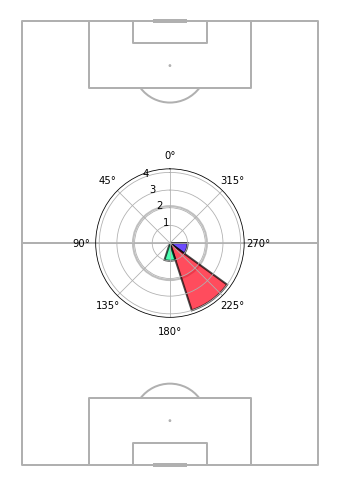

In [23]:
# plot the random data as scatter and arrows
fig, ax = p.draw(figsize=(10, 10*p.ax_aspect))


# plot a polar chart
ax_polar = fig.add_axes([0.35, 0.35, 0.3, 0.3], polar=True)
ax_polar.patch.set_alpha(0.2)
ax_polar.set_theta_direction(1)
if p.vertical:
    ax_polar.set_theta_zero_location('N')
ax_polar.bar(2*np.pi - (bin_edges[:-1] + width/2), count, width=width, color=colors,
             edgecolor='black', lw=2, alpha=0.7)